# Answering Business Questions Using SQL

In this project We'll be working with a modified version of a database called Chinook. The Chinook database is provided as a SQLite database file called chinook.db


## About the Database
   The Chinook database is provided as a SQLite database file called chinook.db . The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.

   The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables.
   You can find more about Chinook [here](https://github.com/lerocha/chinook-database).
   
   A copy of the database schema is below .

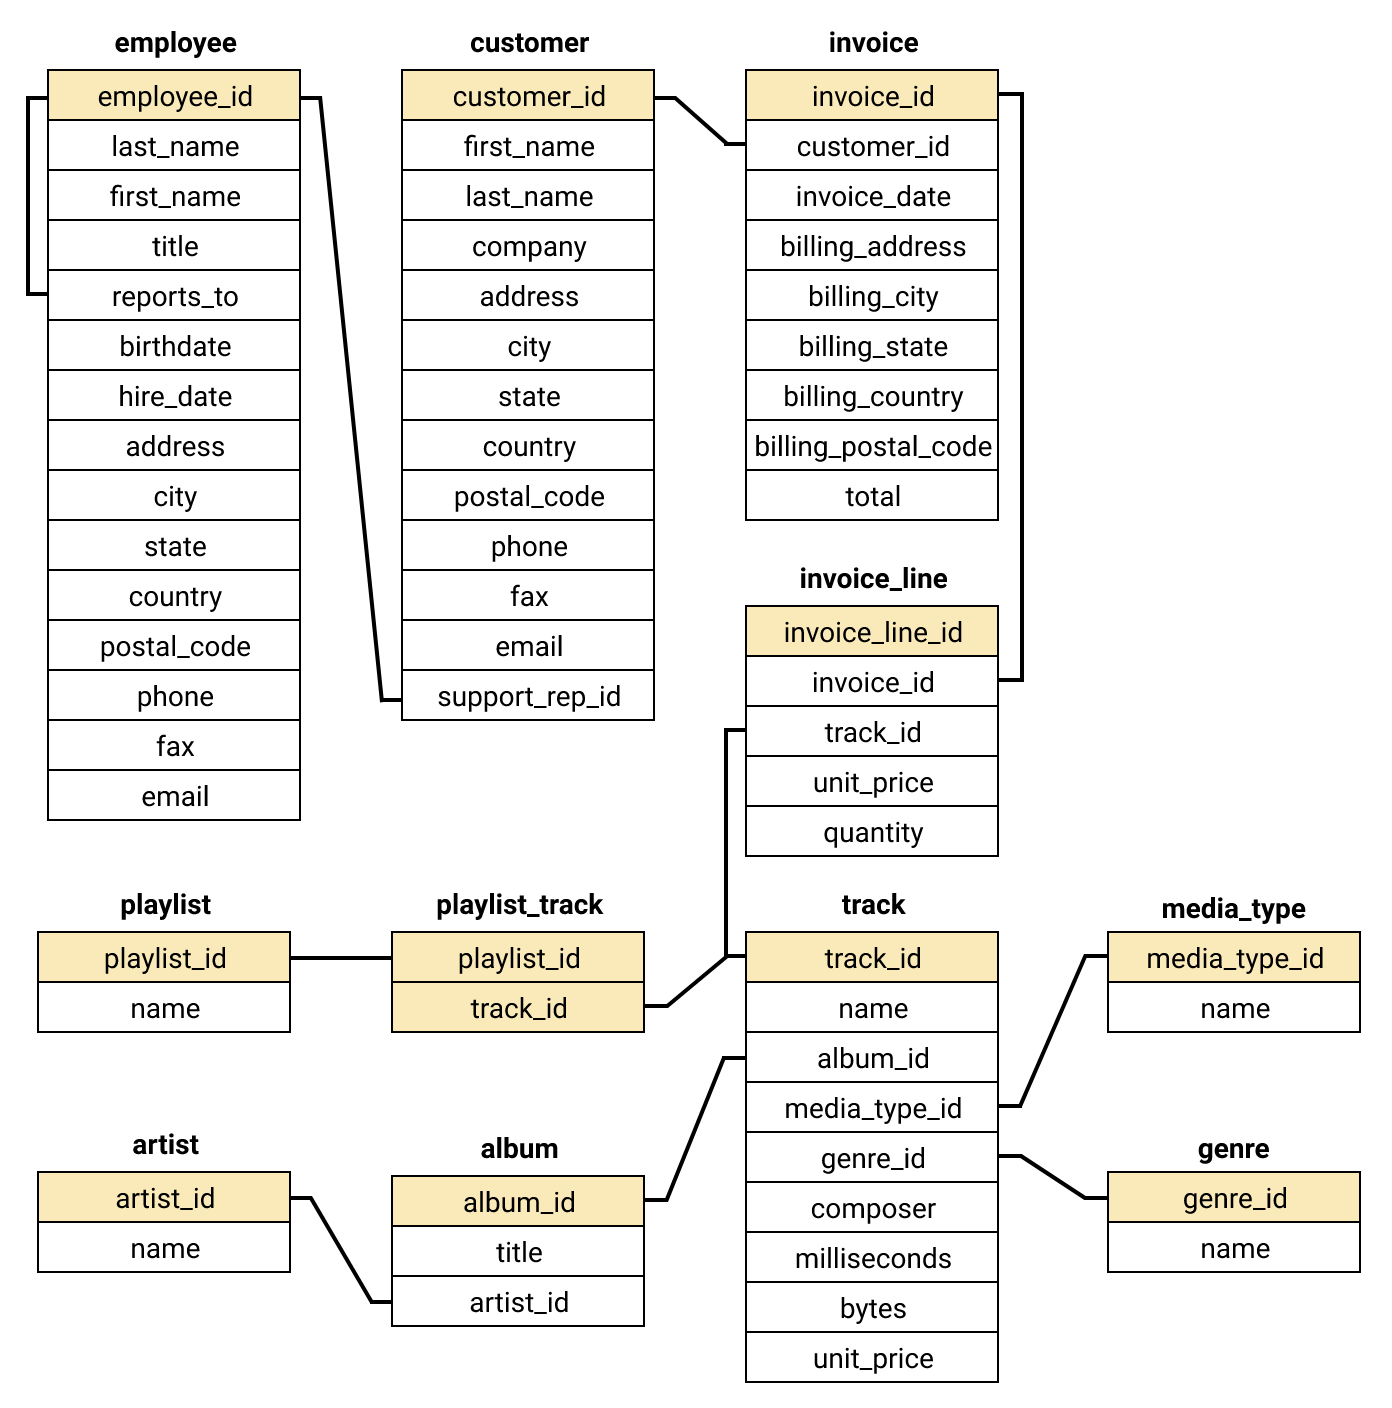

## Aim of the project
   In this project we are going to answer some business question  using SQL .

In [1]:
%load_ext sql
%sql sqlite:///chinook.db

'Connected: @chinook.db'

In [46]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view")

Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


To get first 3 rows of customer table

In [47]:

%%sql
SELECT * 
FROM customer
LIMIT 3

Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [48]:
%%sql
SELECT * FROM genre
LIMIT 3

Done.


genre_id,name
1,Rock
2,Jazz
3,Metal


In [49]:
%%sql
SELECT * FROM track
LIMIT 1

Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99


In [50]:
%%sql
SELECT *
FROM invoice
LIMIT 1

Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84


## To find out which genres are sold the most tracks in USA

1.The chinook record store has to select 3 out 4 albums from the new record label list.The 4 album list is as follows:

|Artist_Name| Genre  |
|-----------|--------|
|Regal      | Hip-Hop|
|Red Tone   | Punk   |
|Meteor and the Girls|	Pop|
|Slim Jim Bites	|Blues|

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

## 1. For finding out which genres sell the best in USA

In [51]:
%%sql
WITH track_number AS
                  (
                      SELECT 
                            g.name ,
        
                            COUNT(g.name) genre_count
        
        
                    FROM customer c
                    INNER JOIN invoice i ON i.customer_id = c.customer_id
                    INNER JOIN invoice_line il ON il.invoice_id = i.invoice_id
                    INNER JOIN track t ON t.track_id = il.track_id
                    INNER JOIN genre g ON g.genre_id = t.genre_id

                    WHERE c.country =='USA'
                    GROUP BY 1

                    ORDER by genre_count DESC
                  )
SELECT tn.name genre_name,
       tn.genre_count,
       ROUND(CAST(tn.genre_count AS Float)*100/(SELECT CAST(SUM(genre_count)AS Float) FROM track_number),3 )genre_percentage
       
FROM track_number tn 






Done.


genre_name,genre_count,genre_percentage
Rock,561,53.378
Alternative & Punk,130,12.369
Metal,124,11.798
R&B/Soul,53,5.043
Blues,36,3.425
Alternative,35,3.33
Latin,22,2.093
Pop,22,2.093
Hip Hop/Rap,20,1.903
Jazz,14,1.332


From analysing the most commonly sold genres in USA , its found that Rock music tracks are  most liked by the music lovers which is around 53.378 % followed by 
Alternative &Punk,Metal,R&B/Soul in that order.Blues genres is in 5 th position  whereas pop and Hip/Hop are in 8 th and 9 th position respectively.

Based on the sales of tracks from their genres,we could recommend the following 3 artists:

1. Red Tone, genre-Punk
2. Slim Jim Bites , genre-Blues
3. Meteor and the Girls, genre- Pop



## 2.Total sales done by each sales support agent

In [52]:
%%sql

WITH total_purchase_per_cust AS
            (
                SELECT c.support_rep_id ,
                        c.customer_id cust_id,
                        SUM(i.total) total_per_customer
                FROM customer c
                INNER JOIN invoice i ON i.customer_id=c.customer_id
                GROUP BY 1, 2
                ORDER By 1
            ),
    total_sales_per_emp AS
                (
                    SELECT tpc.support_rep_id,
                            SUM(tpc.total_per_customer) total_sales_by_emp
                    
                    FROM total_purchase_per_cust tpc
                     GROUP BY 1
                            
                )
SELECT 
    e.employee_id,
    e.first_name||" "||e.last_name employee_name,
    e.title,
    e.hire_date,
    round(tse.total_sales_by_emp,3) total_sales_by_employee
FROM employee e
INNER JOIN total_sales_per_emp tse ON tse.support_rep_id=e.employee_id

ORDER BY 1,2 DESC


Done.


employee_id,employee_name,title,hire_date,total_sales_by_employee
3,Jane Peacock,Sales Support Agent,2017-04-01 00:00:00,1731.51
4,Margaret Park,Sales Support Agent,2017-05-03 00:00:00,1584.0
5,Steve Johnson,Sales Support Agent,2017-10-17 00:00:00,1393.92


Highest sales is done by Jane Peacock which is  36.76% of total sales ie \\$1731.51  Margeret Park had done a sales for \\$1584 (33.63 % ) of total sales and Steve Johnson did sales worth \\$1393.92 (29.57% of total sales) .But when we consider the hiring date,its seen  that steve johnson who got hired in mid of october 2017 had performed well as compared to Jane Peacok whose joining date is 1st of April.

## 3. Data on purchases from different countries

In [132]:
%%sql
WITH cust_country AS
                (
                    SELECT c.customer_id,
                            c.country ,
                            COUNT(i.invoice_id) no_of_purchases,
                            SUM(i.total) total_purchase_per_cust
                    FROM customer c 
                    INNER JOIN invoice i ON i.customer_id = c.customer_id
                    GROUP BY 1,2
                    ORDER BY 2
                ),
    country_group AS
                (
                    SELECT cc.country,
                           COUNT(cc.customer_id) total_customers,
                           SUM(cc.total_purchase_per_cust) Total_sales,
                            SUM(cc.total_purchase_per_cust)/SUM(cc.no_of_purchases) AVG_order_value,
        
                            CASE 
                                WHEN COUNT(cc.customer_id) = 1 THEN 'OTHER'
                                ELSE cc.country   
                            END AS country1
        
           
             
                    FROM cust_country cc
                    GROUP BY 1
                ),
        country_sort AS
                    (
                        SELECT 
                            cg.country1 country,
                            SUM(cg.total_customers) Total_customers,
                            SUM(cg.Total_sales) Total_sales,
                            SUM(cg.Total_sales)/SUM(cg.Total_customers) AVG_Sales_PER_Customer,
                            cg.AVG_order_value Avg_order_value,
                            CASE
                                WHEN cg.country1='OTHER' THEN 1
                                ELSE 0
                            END AS sort 
                        FROM country_group cg
                        GROUP BY 1
                        ORDER BY sort ASC ,Total_sales DESC
                    )
SELECT cs.country Country,
       cs.Total_customers Total_customers,
       ROUND(cs.Total_sales,2) Total_sales,
    ROUND(cs.AVG_sales_PER_Customer,2) AVG_sales_PER_Customer,
       ROUND(cs. Avg_order_value,2) AVG_order_value
FROM country_sort cs

       

 * sqlite:///chinook.db
Done.


Country,Total_customers,Total_sales,AVG_sales_PER_Customer,AVG_order_value
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
OTHER,15,1094.94,73.0,7.92


From analyzing the average order from each country,czech Republic has the highest order value of  \\$9.11 followed by United kingdom which is \\$8.77 and India where the order value is \\$8.72.

## 4. percentage of purchases of individual tracks vs whole albums

In [133]:
%%sql
WITH invoice_info AS
                  (
                      SELECT il.invoice_id invoice_id,
                              il.track_id track_id,
                              t.album_id album_id
                      FROM invoice_line il
                      INNER JOIN track t ON t.track_id = il.track_id
                      
                  ),
    Album_info AS
                (
                    SELECT ii.invoice_id ,
                            ii.track_id,
                            ii.album_id
                    FROM invoice_info ii
                    GROUP BY 1
                    
                    
                    
                            
                ),
    Album_or_track AS
                    (
                     SELECT ai.invoice_id ,
                        CASE
                           WHEN
                                (
                                    
                                    (SELECT t.track_id
                                    FROM track t
                                    WHERE t.album_id = ai.album_id
                                    EXCEPT
                                    SELECT ii.track_id 
                                    FROM invoice_info ii
                                    WHERE ii.invoice_id = ai.invoice_id
                                    )IS NULL
                                    
                                    AND
                                    (SELECT ii.track_id 
                                    FROM invoice_info ii
                                    WHERE ii.invoice_id = ai.invoice_id
                                    EXCEPT
                                    SELECT t.track_id
                                    FROM track t
                                    WHERE t.album_id = ai.album_id
                                    )IS NULL
                                   )THEN "YES"
                                    ELSE "NO"
                                END AS ALBUM_Purchased
                        FROM Album_info ai
                                
                        
                    )
               
        
                      
SELECT  COUNT(at.invoice_id) No_of_invoices,
       ROUND(CAST(COUNT(at.invoice_id)AS FLOAT)*100/(SELECT COUNT(*) FROM invoice),2) Percentage,
        at.ALBUM_purchased album_purchased
        
FROM Album_or_track at
GROUP BY 3
                      
        
                    


    

 * sqlite:///chinook.db
Done.


No_of_invoices,Percentage,album_purchased
500,81.43,NO
114,18.57,YES


The percentage of full album purchased is only 18.57 % .So it would be better if the chinook store should continue to buy single tracks from record companies.

## 5.Which artist is used in the most playlist?

In [108]:
%%sql
WITH artist_info AS
              (
                SELECT p.playlist_id,
                       pt.track_id,
                       t.album_id,
                        a.artist_id,
                        ar.name
                From playlist p
                INNER JOIN playlist_track pt ON pt.playlist_id=p.playlist_id
                INNER JOIN track t ON t.track_id = pt.track_id
                INNER JOIN album a ON a.album_id = t.album_id
                INNER JOIN artist ar ON ar.artist_id = a.artist_id
              ),
    Artist_occurence AS
                     (
                       SELECT COUNT(ai.name) occurred,
                              ai.playlist_id,
                            ai.name
                       FROM artist_info ai
                       GROUP BY 2,3
                       ORDER BY 3
                     )
    SELECT SUM(ao.occurred) NO_of_occurences,
           ao.name artist_name
    FROM Artist_occurence ao
    GROUP BY 2
    ORDER BY 1 DESC
    LIMIT 10
    


 * sqlite:///chinook.db
Done.


NO_of_occurences,artist_name
516,Iron Maiden
333,U2
296,Metallica
252,Led Zeppelin
226,Deep Purple
184,Lost
177,Pearl Jam
145,Faith No More
145,Eric Clapton
143,Lenny Kravitz


The artist Iron Maiden appearead in most of the playlist.


## 6. How many tracks have been purchased vs not purchased?

In [105]:
%%sql
WITH track_table AS
              (
                  SELECT t.track_id
                  FROM track t
              ),
    purchase_info AS
                  ( 
                      SELECT tt.track_id,
                      CASE 
                         WHEN 
                          (
                              tt.track_id 
                              IN
                              (SELECT il.track_id
                              FROM invoice_line il)
                               
                             
                           )THEN "purchased"
                           ELSE "NOT purchased" 
                      
                        END AS purchase_or_not 
                      FROM track_table tt
        
                       )
        
SELECT pi.purchase_or_not,
       COUNT(pi.track_id)NO_of_tracks,
       ROUND(CAST(COUNT(pi.track_id)AS FLOAT)*100/(SELECT COUNT(*)FROM track t),2) Percentage_of_Purchase
        
FROM purchase_info pi
GROUP BY 1
        
        
        

 * sqlite:///chinook.db
Done.


purchase_or_not,NO_of_tracks,Percentage_of_Purchase
NOT purchased,1697,48.44
purchased,1806,51.56


No of tracks purchased is 1806 and not purchased is 1697.ie only 51.56% of total tracks has been purchased.

## 7. Is the range of tracks in the store reflective of their sales popularity?

In [130]:

%%sql
WITH store_track_total AS
                   (
                    SELECT  t.genre_id,
                            g.name genre,
                            COUNT(t.track_id) total_tracks_store ,
                            ROUND(CAST(COUNT(t.track_id)AS FLOAT)*100/(SELECT COUNT(t.track_id)FROM track t),2) PERCENTAGE_TRACKS_IN_STORE
                    FROM track t
                    INNER JOIN genre g ON g.genre_id =t.genre_id
                    GROUP BY 2 
                    
                   ),
       total_track_sold AS
                     (
                       SELECT COUNT(il.track_id) total_track_sold,
                              ROUND(CAST(COUNT(il.track_id)AS FLOAT)*100/(SELECT COUNT(il.track_id)FROM invoice_line il),2) PERCENTAGE_SOLD, 
                              t.genre_id ,
                              g.name genre
                       FROM invoice_line il 
                       INNER JOIN track t ON il.track_id =t.track_id
                       INNER JOIN genre g ON g.genre_id = t.genre_id
                       GROUP BY 4   
                     )
    

     
SELECT st.genre,
        st.PERCENTAGE_TRACKS_IN_STORE,
         tt.PERCENTAGE_SOLD
FROM store_track_total st
INNER JOIN total_track_sold tt ON tt.genre_id =st.genre_id
ORDER BY 3 DESC



 * sqlite:///chinook.db
Done.


genre,PERCENTAGE_TRACKS_IN_STORE,PERCENTAGE_SOLD
Rock,37.03,55.39
Metal,10.68,13.01
Alternative & Punk,9.48,10.34
Latin,16.53,3.51
R&B/Soul,1.74,3.34
Blues,2.31,2.61
Jazz,3.71,2.54
Alternative,1.14,2.46
Easy Listening,0.69,1.56
Pop,1.37,1.32


Considering that each track belonging to a particular genre can be bought more than once by different customers ,because sometimes a particular track can be a hit which can lead to more sales irrespective of genre and not every song belonging to a particular genre will get sold.
 The store has more rock genre tracks and has the higest sales of 55.39% of total tracks sold from all genres  followed by metal genre.But the range of tracks in store is not reflective of the sales popularity for instance the store has a total tracks of 16.53% belonging to Latin but their sales is less compared to metal which has tracks less than latin.The store keeps all type of genre to satisfy all types of customers and also try to stock more tracks like rock genre compared to others based on popularity .

## 8.Do protected vs non-protected media types have an effect on popularity?

For answering this question first we can take a look at the media_type table .

In [131]:
%%sql
SELECT *
FROM media_type

 * sqlite:///chinook.db
Done.


media_type_id,name
1,MPEG audio file
2,Protected AAC audio file
3,Protected MPEG-4 video file
4,Purchased AAC audio file
5,AAC audio file


From the table ,we can see that there are 2 types of protected files (	Protected AAC audio file & Protected MPEG-4 video file).For our analysis purpose we can classify other 3 types (MPEG audio file,Purchased AAC audio file, AAC audio file) into Non_protected types.

In [129]:
%%sql
WITH in_store_track AS
                   (
                    SELECT COUNT(t.track_id) tracks_in_store,
                               t.media_type_id,
                                mt.name
                    FROM track t
                    INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
                    GROUP BY 3
                   ),
    track_sold AS
                (
                    
                 SELECT COUNT(il.track_id) tracks_sold,
                         t.media_type_id,
                         mt.name
                FROM invoice_line il
                INNER JOIN track t ON t.track_id = il.track_id
                INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
                GROUP BY 3
                ),
        
    store_vs_sold AS
                (
                    SELECT it.name media_type,
                           it.tracks_in_store,
                           ts.tracks_sold
                    FROM in_store_track it
                    INNER JOIN track_sold ts On ts.media_type_id = it.media_type_id
                ),
        protected_vs_nonprotected AS
                              (
                                SELECT SUM(ss.tracks_in_store) tracks_in_store,
                                       SUM(ss.tracks_sold) tracks_sold,
                                       CASE 
                                          WHEN
                                            (  
                                              ss.media_type like "%Protected%"
                                             )THEN "Protected"
                                             ELSE  "Non_protected"
                                      END AS Media_type
                                FROM store_vs_sold ss
                                GROUP BY 3
                              )
SELECT pn.Media_type,
       pn.tracks_in_store,
       ROUND(CAST(pn.tracks_in_store AS FLOAT)*100/(SELECT COUNT(t.track_id) FROM track t),2) PERCENTAGE_TRACKS_in_STORE,
       pn.tracks_sold,
       ROUND(CAST(pn.tracks_sold AS FLOAT)*100/(SELECT COUNT(il.track_id) FROM invoice_line il),2) PERCENTAGE_TRACKS_SOLD
       
FROM protected_vs_nonprotected pn
                    
    


 * sqlite:///chinook.db
Done.


Media_type,tracks_in_store,PERCENTAGE_TRACKS_in_STORE,tracks_sold,PERCENTAGE_TRACKS_SOLD
Non_protected,3052,87.13,4315,90.71
Protected,451,12.87,442,9.29


Protected vs Non protected media types seems to have an effect on popularity.About 90.71 % of non protected media types has been sold and the store has more non protected media than protected .The selling percentage of protected types is only 9.29 % and may be because of this less popularity the store has only 12.87% of protected types in stock compared to 87.13% of non protected types.

## Conclusion

Some of the findings are :
- From analysing the most commonly sold genres in USA , its found that Rock music tracks are most liked by the music lovers which is around 53.378 % followed by Alternative &Punk,Metal,R&B/Soul in that order.
- The chinook store should continue to buy single tracks from record companies since the percentage of full album purchased is only 18.56 % where as single track purchase is 81.43 % .
- Tracks belonging to Rock genre is more popular than other genres and the store has about 37.03 % of tracks in Rock genre .
- Non protected media types more popular with a track sales of 90.71 % than protected media types.